# Importing Libraries

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import normalize

# Importing Data

In [3]:
data_df=pd.read_csv('/Users/Asus/Documents/Atmel Studio/Protein.csv')

In [4]:
# Complete information about data
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RMSD    45730 non-null  float64
 1   F1      45730 non-null  float64
 2   F2      45730 non-null  float64
 3   F3      45730 non-null  float64
 4   F4      45730 non-null  float64
 5   F5      45730 non-null  float64
 6   F6      45730 non-null  float64
 7   F7      45730 non-null  float64
 8   F8      45730 non-null  int64  
 9   F9      45730 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


In [5]:
# Data Exploration: Summarize Data
data_df.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


In [6]:
# Shape
data_df.shape


(45730, 10)

In [7]:
# Count Rows
data_df.count()

RMSD    45730
F1      45730
F2      45730
F3      45730
F4      45730
F5      45730
F6      45730
F7      45730
F8      45730
F9      45730
dtype: int64

In [8]:

# Rename features
data_df = data_df.rename(columns = {"RMSD": "RMSD", "F1": "Surface Area", "F2": "Non polar Area", "F3": "F.A of exposed non polar residue", "F4": "F.A of exposed non polar part of residue.", "F5": " Molecular mass weighted exposed area.", "F6": "Average deviation from standard exposed area of residue.", "F7": "Euclidian distance", "F8": "Secondary structure penalty", "F9": "Spacial Distribution constraints (N,K Value)"})
data_df.head()

,RMSD,Surface Area,Non polar Area,F.A of exposed non polar residue,F.A of exposed non polar part of residue.,Molecular mass weighted exposed area.,Average deviation from standard exposed area of residue.,Euclidian distance,Secondary structure penalty,"Spacial Distribution constraints (N,K Value)"
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


In [9]:
# No Missing Values
data_df.isnull().head()

,RMSD,Surface Area,Non polar Area,F.A of exposed non polar residue,F.A of exposed non polar part of residue.,Molecular mass weighted exposed area.,Average deviation from standard exposed area of residue.,Euclidian distance,Secondary structure penalty,"Spacial Distribution constraints (N,K Value)"
0,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False


# Correlations Using Heatmaps


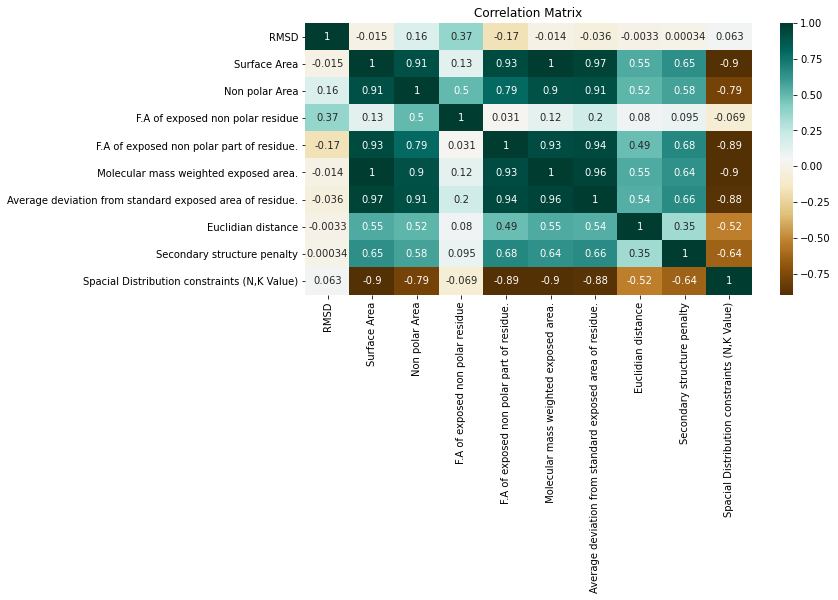

In [9]:
# Correlation Heatmap
plt.figure(figsize = (10, 5))
c = data_df.corr()
sns.heatmap(c, cmap = "BrBG", annot = True)
plt.title("Correlation Matrix")
plt.show()

# Multiple Linear Regression


<AxesSubplot:xlabel='Surface Area', ylabel='Euclidian distance'>

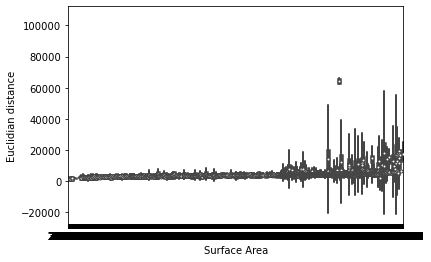

In [10]:
# Surface Area vs Euclidian distance
sns.violinplot(x = "Surface Area", y = "Euclidian distance", data = data_df)

In [10]:
X = data_df[["Surface Area", "F.A of exposed non polar part of residue.","Spacial Distribution constraints (N,K Value)"]]
y = data_df["Euclidian distance"]

In [11]:
print((X))

       Surface Area  F.A of exposed non polar part of residue.  \
0          13558.30                                   162.1730   
1           6191.96                                    53.3894   
2           7725.98                                    67.2887   
3           8424.58                                    67.8325   
4           7460.84                                    52.4123   
...             ...                                        ...   
45725       8037.12                                    64.3390   
45726       7978.76                                    75.8654   
45727       7726.65                                    70.9903   
45728       8878.93                                    94.0314   
45729      12732.40                                   157.6300   

       Spacial Distribution constraints (N,K Value)  
0                                           27.0302  
1                                           38.5468  
2                                           3

In [13]:
print((y))

0        4287.87
1        3328.91
2        2981.04
3        3248.22
4        2814.42
          ...   
45725    3384.21
45726    3974.52
45727    3290.46
45728    3421.79
45729    4626.85
Name: Euclidian distance, Length: 45730, dtype: float64


# Split data Set in Training

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [13]:
ml=LinearRegression()
ml.fit(X_train,y_train)

LinearRegression()

In [14]:
y_pred=ml.predict(X_test)
print(y_pred)
pd.DataFrame({"Actual": y_test, "Predicted": y_pred}).head()

[3494.62735425 5079.40035249 2106.46346357 ... 5471.20594118 3237.40702575
 3178.24497809]


,Actual,Predicted
23527,3572.96,3494.627354
12311,4515.13,5079.400352
14747,1390.21,2106.463464
5809,4090.82,3965.480011
20851,4050.32,3884.107368


In [15]:
from sklearn.metrics import r2_score
r2_score (y_test,y_pred)

0.3021855249537857

Text(0.5, 1.0, 'Actual Vs. Predicted (Euclidian distance)')

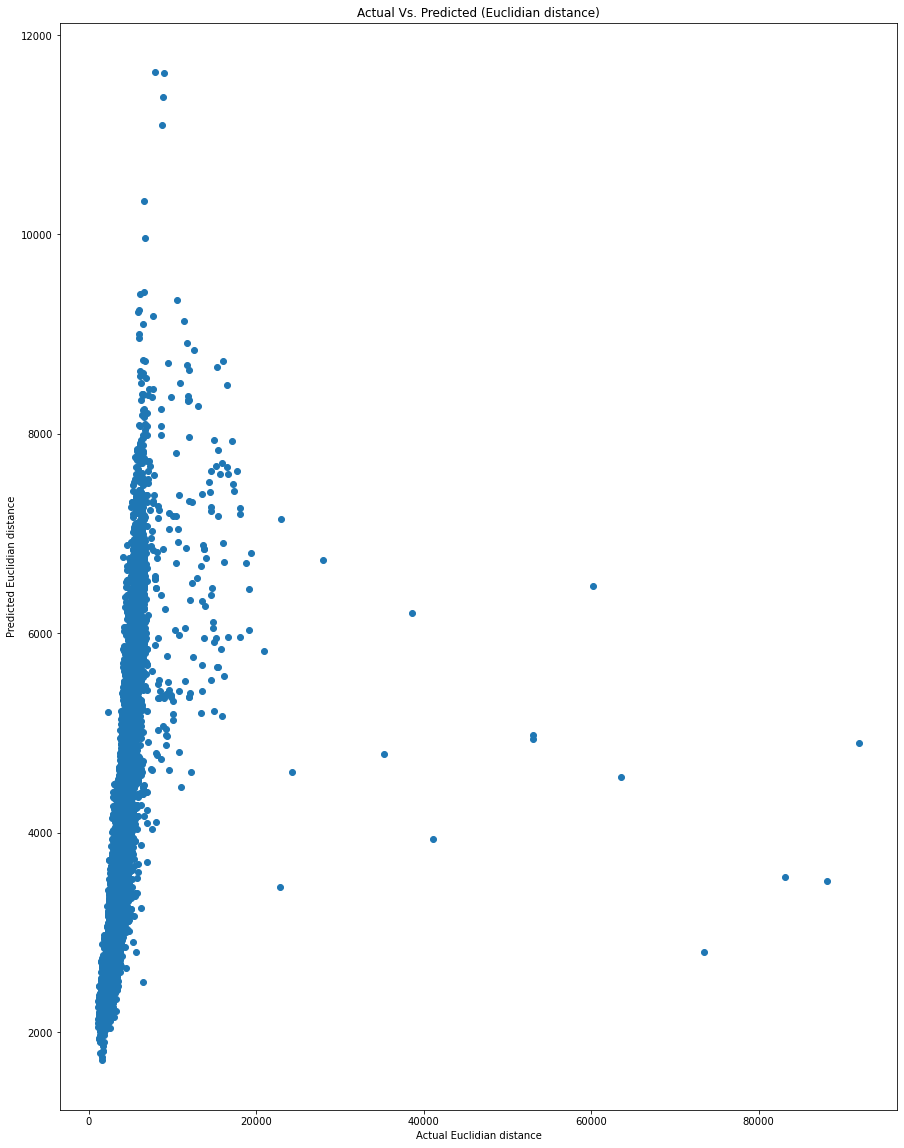

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,20))
plt.scatter(y_test,y_pred)
plt.xlabel('Actual Euclidian distance')
plt.ylabel('Predicted Euclidian distance')
plt.title('Actual Vs. Predicted (Euclidian distance)')

# Example 2

In [16]:
X1 = data_df[["Surface Area", "F.A of exposed non polar part of residue.","Secondary structure penalty"]]
y1 = data_df["Euclidian distance"]

In [17]:
from sklearn.model_selection import train_test_split
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=0)

In [18]:
y1_pred=ml.predict(X1_test)
print(y1_pred)
pd.DataFrame({"Actual Values": y1_test, "Predicted Values": y1_pred}).head()

[ 4302.13955372 -1930.73411106  3116.25083635 ... -2981.45503904
  3924.66049321 -1334.93752777]


,Actual Values,Predicted Values
23527,3572.96,4302.139554
12311,4515.13,-1930.734111
14747,1390.21,3116.250836
5809,4090.82,4987.404034
20851,4050.32,-237.344215


In [19]:
from sklearn.metrics import r2_score
r2_score (y1_test,y1_pred)

-5.451215571394999

Text(0.5, 1.0, 'Actual Vs. Predicted')

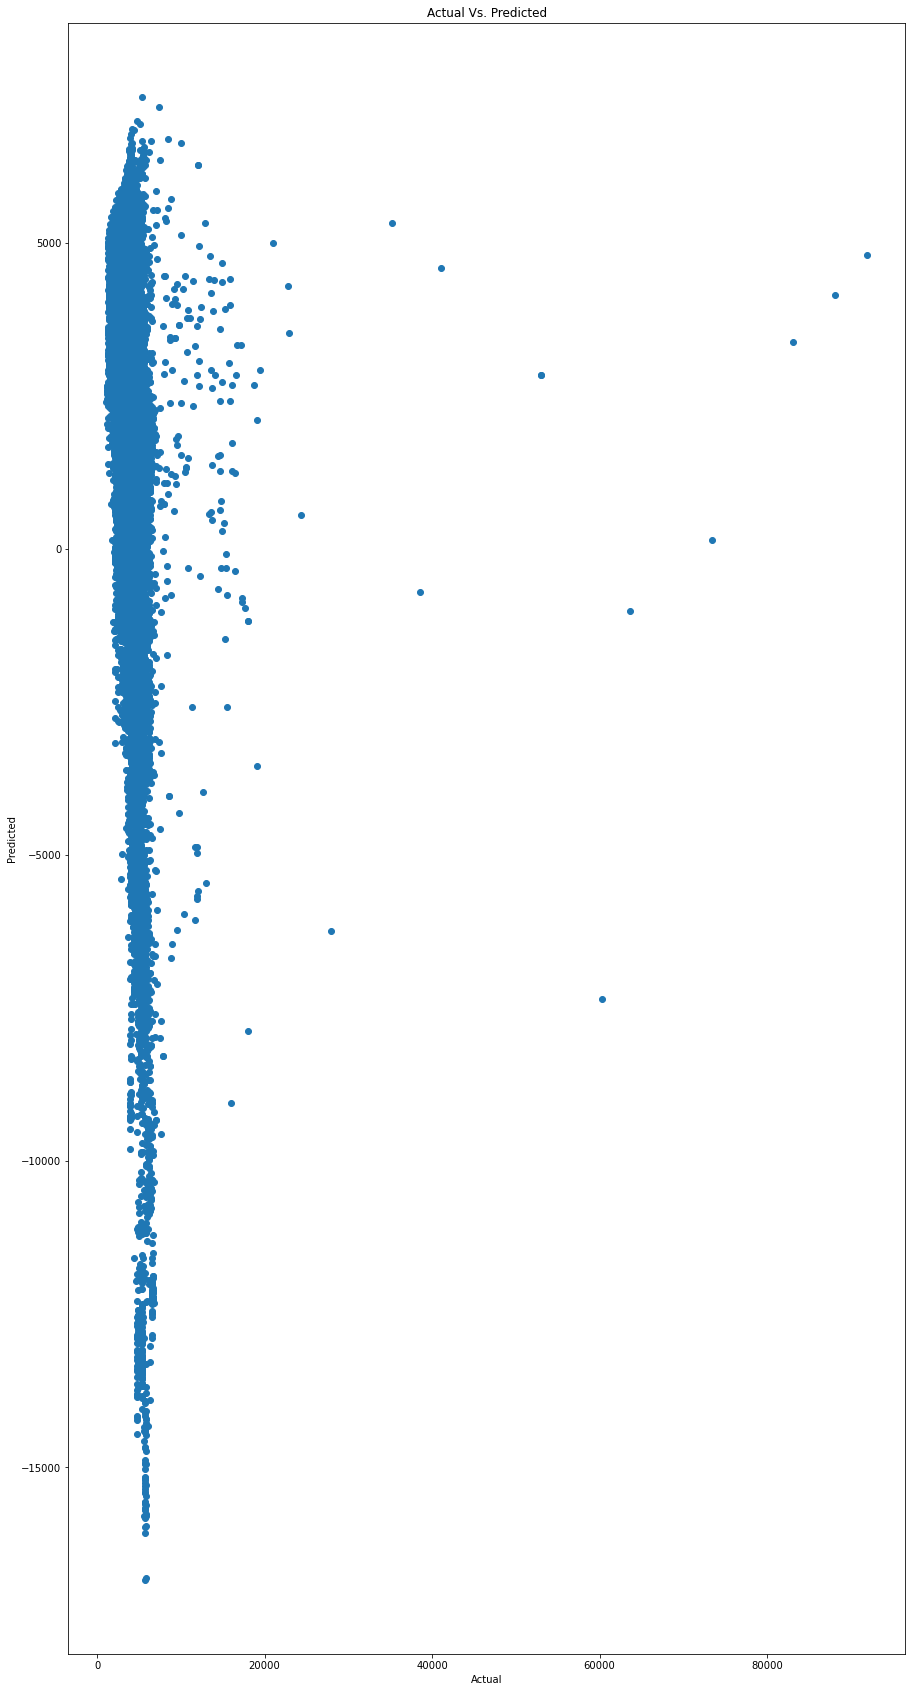

In [24]:
import matplotlib.pyplot as plt
plt.figure(figsize=(15,30))
plt.scatter(y1_test,y1_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual Vs. Predicted')

# Normalization Of Data

In [26]:
data_df = normalize(data_df, axis=0) #Without using normalization first dataset importing mechanism can be used

# Cost Function for (X1 vs Y1)

In [29]:
#X1=data_df.drop(['Euclidian distance'],axis=1).values
#y1=data_df['Euclidian distance'].values
X1=data_df[1:,0:7]
y1=data_df[1:, 7]
print(X1[0:3])
print(y1[0:3])

[[0.00285185 0.0027129  0.00226313 0.00396874 0.00212662 0.00253862
  0.00252361]
 [0.00439311 0.00338501 0.00240691 0.00338281 0.00268026 0.00339868
  0.00236702]
 [0.00750784 0.00369109 0.00330199 0.0042561  0.00270192 0.00382468
  0.00316713]]
[0.00349026 0.00312553 0.00340566]


In [32]:
def gradient(X1,y1,alpha,epoch):
  m=X1.shape[0]  #number of samples
  ones = np.ones((m,1))
  X1 = np.concatenate((ones,X1),axis=1)
  n = X1.shape[1]
  Theta = np.ones(n)  #n = 5th parameter initialize
  h = np.dot(X1, Theta) #Compute Hypothesis

  #Gradient descent Algorithm
  cost = np.ones(epoch)
  for i in range (0,epoch):
      Theta[0] = Theta[0] - (alpha / X1.shape[0]) * sum(h-y1)
      for j in range(1,n):
       Theta[j] = Theta[j] - (alpha/ X1.shape[0]) * sum((h-y1) * X1[:, j])
      h = np.dot(X1,Theta)
      cost[i] = 1/(2*m) * sum(np.square(h-y1)) #compute Cost
  return cost, Theta 

# Calculating theta & Cost

In [33]:
#Calcualting Theta & Cost
cost, Theta = gradient( X1, y1, 0.01, 1000)
print(Theta)
print(cost)

[-0.02508238  0.99614897  0.99541884  0.99551048  0.99527069  0.99560827
  0.9954208   0.99551129]
[5.15159678e-01 5.04907590e-01 4.94859544e-01 4.85011479e-01
 4.75359414e-01 4.65899450e-01 4.56627761e-01 4.47540603e-01
 4.38634301e-01 4.29905256e-01 4.21349941e-01 4.12964898e-01
 4.04746737e-01 3.96692139e-01 3.88797846e-01 3.81060670e-01
 3.73477482e-01 3.66045218e-01 3.58760875e-01 3.51621508e-01
 3.44624232e-01 3.37766219e-01 3.31044698e-01 3.24456951e-01
 3.18000317e-01 3.11672185e-01 3.05469999e-01 2.99391252e-01
 2.93433486e-01 2.87594295e-01 2.81871319e-01 2.76262243e-01
 2.70764802e-01 2.65376773e-01 2.60095980e-01 2.54920287e-01
 2.49847604e-01 2.44875879e-01 2.40003104e-01 2.35227309e-01
 2.30546564e-01 2.25958977e-01 2.21462695e-01 2.17055900e-01
 2.12736810e-01 2.08503682e-01 2.04354803e-01 2.00288497e-01
 1.96303120e-01 1.92397062e-01 1.88568745e-01 1.84816620e-01
 1.81139172e-01 1.77534914e-01 1.74002390e-01 1.70540171e-01
 1.67146859e-01 1.63821083e-01 1.60561498e-01 1

# Plotting the Cost Function


Lowest Cost =4.306661397877494e-05


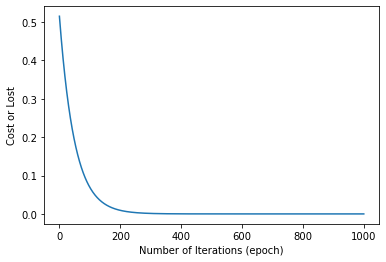

In [34]:
plt.plot(cost)
plt.xlabel('Number of Iterations (epoch)')
plt.ylabel("Cost or Lost")
plt.show
print("Lowest Cost ="+ str(np.min(cost)))
#print("Cost after 10 iterations =" + str(cost[-1]))

# Polynomial Regression

In [78]:
X = data_df["Surface Area"]
y = data_df["Euclidian distance"]

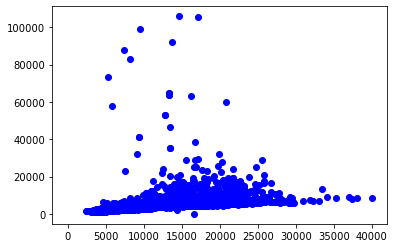

In [79]:
my_model = np.poly1d(np.polyfit(X, y, 2))
myline = np.linspace(0, 10, 100)
plt.scatter(X, y, color = "blue")
plt.plot(myline, my_model(myline), color ="r")
plt.show()

In [25]:
# Prediction
X = data_df[["Surface Area"]]
y = data_df["Euclidian distance"]

Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(degree = 2)), ("mode", LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(X, y)
ypipe = pipe.predict(X)
ypipe[0:5]

array([5096.01044543, 2916.67526523, 3418.42426866, 3638.5712894 ,
       3333.50348211])

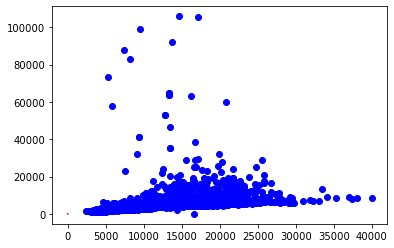

In [26]:
X = data_df["Surface Area"]
y = data_df["Euclidian distance"]

my_model = np.poly1d(np.polyfit(X, y, 3))
myline = np.linspace(0, 10, 100)
plt.scatter(X, y, color = "blue")
plt.plot(myline, my_model(myline), c ="r")
plt.show()

In [27]:
X = data_df[["Surface Area"]]
y = data_df["Euclidian distance"]

Input = [("scale", StandardScaler()), ("polynomial", PolynomialFeatures(degree = 3)), ("mode", LinearRegression())]
pipe = Pipeline(Input)

pipe.fit(X, y)
ypipe = pipe.predict(X)
ypipe[0:5]

array([5079.97598134, 2908.34430658, 3450.3978306 , 3678.98470036,
       3360.75514218])

In [28]:
# Evaluation
from sklearn.metrics import r2_score
X = data_df["Surface Area"]
y = data_df["Euclidian distance"]
p = np.poly1d(np.polyfit(X, y, 3))
r_squared = r2_score(y, p(X))
r_squared

0.3121993709419333